In [ ]:
import pandas as pd

In [ ]:
df =pd.read_csv('/content/global air pollution dataset.csv')


In [ ]:
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [ ]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [ ]:
df.isnull().sum()

,0
Country,427
City,1
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [ ]:
city_mode = df['City'].mode()[0]
df['City'].fillna(city_mode, inplace=True)

# Verify that the null value in 'City' is filled
print("Null values after filling 'City':")
display(df.isnull().sum())

Null values after filling 'City':


,0
Country,427
City,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [ ]:
country_mode = df['Country'].mode()[0]
df['Country'].fillna(country_mode, inplace=True)

# Verify that the null value in 'City' is filled
print("Null values after filling 'Country':")
display(df.isnull().sum())

Null values after filling 'Country':


,0
Country,0
City,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Ensure the file path is correct for your system.
file_path = r'/content/global air pollution dataset.csv'
try:
    df = pd.read_csv(file_path)

    # Display the first 5 rows
    print("Dataset loaded successfully. First 5 rows:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file was not found at the path: {file_path}")
    print("Please check the file path and name to ensure it is correct.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")



Dataset loaded successfully. First 5 rows:
              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value P

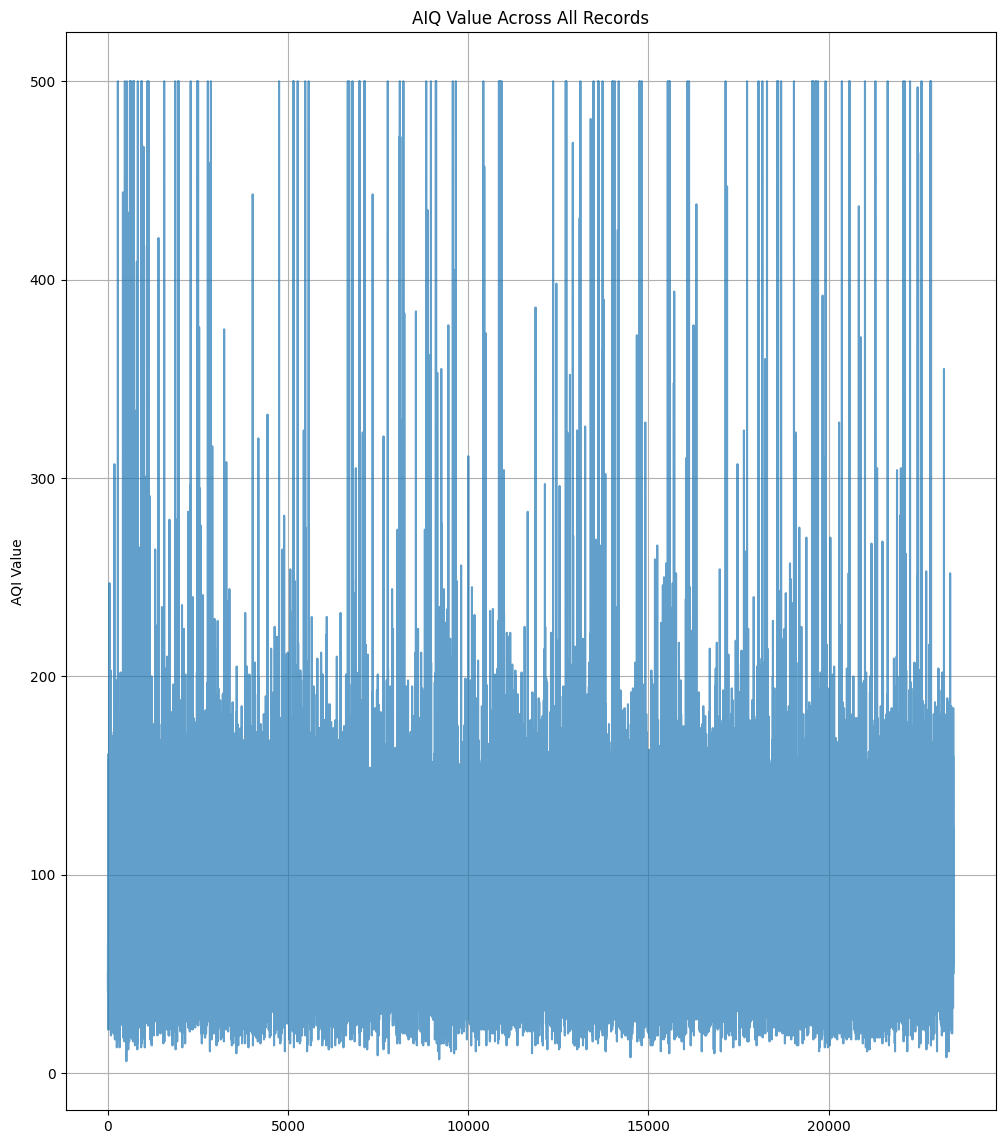

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,14))
plt.plot(df['AQI Value'].reset_index(drop=True),alpha=0.7)
plt.title('AIQ Value Across All Records')
plt.ylabel('AQI Value')
plt.grid(True)
plt.show()

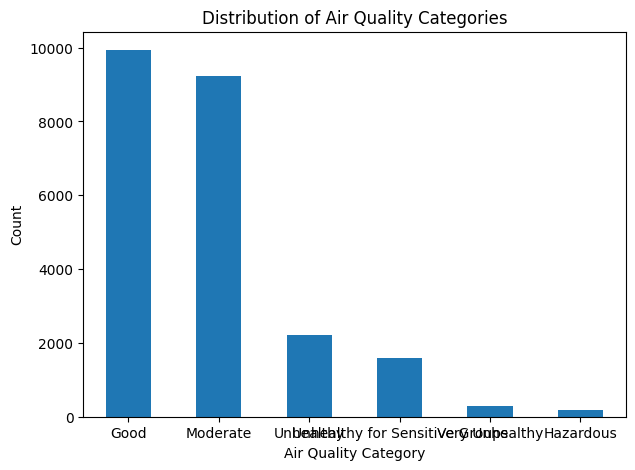

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("global air pollution dataset.csv")

# Plot count of AQI categories
plt.figure(figsize=(7,5))
df['AQI Category'].value_counts().plot(kind='bar')

plt.title("Distribution of Air Quality Categories")
plt.xlabel("Air Quality Category")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.show()


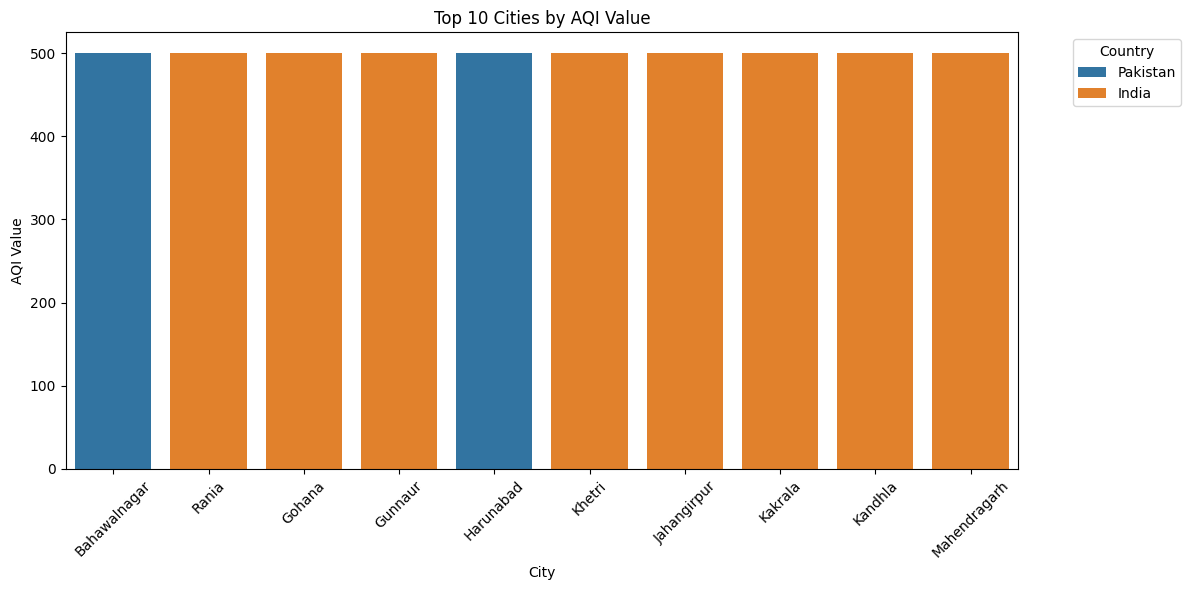

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("global air pollution dataset.csv")

# Convert AQI Value to numeric (important!)
df["AQI Value"] = pd.to_numeric(df["AQI Value"], errors="coerce")

# Get top 10 most polluted cities
top10 = df.nlargest(10, "AQI Value")

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x="City", y="AQI Value", hue="Country", dodge=False)

plt.xticks(rotation=45)
plt.title("Top 10 Cities by AQI Value")
plt.xlabel("City")
plt.ylabel("AQI Value")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


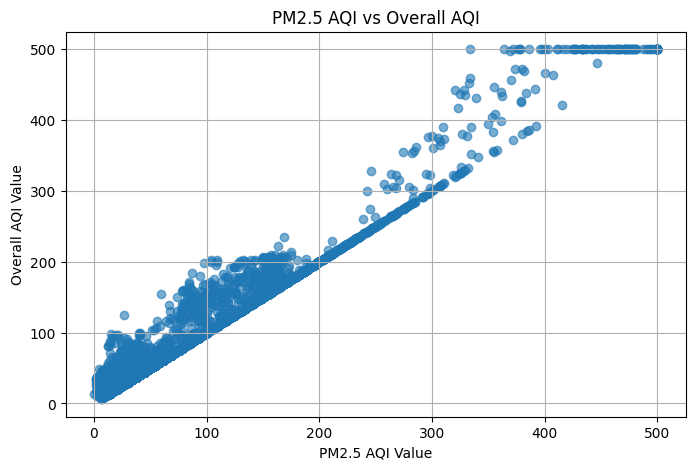

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("global air pollution dataset.csv")

# Convert numeric columns
df["PM2.5 AQI Value"] = pd.to_numeric(df["PM2.5 AQI Value"], errors="coerce")
df["AQI Value"] = pd.to_numeric(df["AQI Value"], errors="coerce")

plt.figure(figsize=(8,5))
plt.scatter(df["PM2.5 AQI Value"], df["AQI Value"], alpha=0.6)

plt.title("PM2.5 AQI vs Overall AQI")
plt.xlabel("PM2.5 AQI Value")
plt.ylabel("Overall AQI Value")
plt.grid(True)

plt.show()


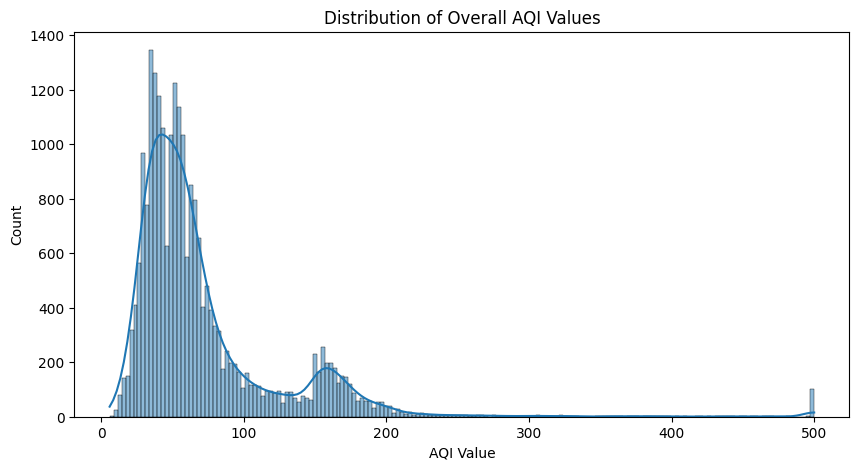

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("global air pollution dataset.csv")

# Convert to numeric (important!)
df["AQI Value"] = pd.to_numeric(df["AQI Value"], errors="coerce")

plt.figure(figsize=(10,5))
sns.histplot(df["AQI Value"], kde=True)

plt.title("Distribution of Overall AQI Values")
plt.xlabel("AQI Value")
plt.ylabel("Count")

plt.show()
